In [96]:
import pandas as pd
import numpy as np

filename1 = "data/heart_disease/processed.cleveland.data"
filename2 = "data/heart_disease/processed.hungarian.data"
filename3 = "data/heart_disease/processed.va.data"
filename4 = "data/heart_disease/processed.switzerland.data" 
'''
description of fields:
  -- 1. #3  (age)  
  -- 2. #4  (sex)        
  -- 3. #9  (cp)         chest pain type      
  -- 4. #10 (trestbps)   resting blood pressure
  -- 5. #12 (chol)       serum cholesterol
  -- 6. #16 (fbs)        (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
  -- 7. #19 (restecg)    resting ecg results (Normal =0, abnormal =1 ,hypetrophy = 2) --> Dummy
  -- 8. #32 (thalach)    maximum heart rate received
  -- 9. #38 (exang)      exercise induced angina (1 = yes; 0 = no) 
  -- 10. #40 (oldpeak)   ST depression induced by exercise relative to rest
  -- 11. #41 (slope)     the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping) --> Dummy
  -- 12. #44 (ca)        number of major vessels (0-3) colored by flourosopy --> Dummy
  -- 13. #51 (thal)      3 = normal; 6 = fixed defect; 7 = reversable defect --> Dummy
  -- 14. #58 (num)       (the predicted attribute)  diagnosis of heart disease (Value 0: < 50% diameter narrowing, Value 1: > 50% diameter narrowing)

column_names = ['Age', 
               'Sex', 
               'ChestPain', 
               'RestingBloodPressure',
               'Cholesterol', 
               'FastingBloodSugar',
               'RestingECG',
               'MaxHeartRate',
               'ExerciseAngina',
               'STExerciseInduced',
               'Slope',
               'NumberVessels',
               'Thal',
               'HeartDisease']

               
''' 
column_names = ['age', 
               'sex', 
               'cp', 
               'trestbps',
               'chol', 
               'fbs',
               'restecg',
               'thalach',
               'exang',
               'oldpeak',
               'slope',
               'ca',
               'thal',
               'num']


def loaddata (filename,col_names):
 
    df =  pd.read_csv(filename,index_col=None,names=col_names, na_values='?')
  
    return df

# load all the files
df_cleveland = loaddata (filename1,column_names)
df_hungarian = loaddata (filename2,column_names)
df_va = loaddata (filename3,column_names)
df_switzerland = loaddata (filename4,column_names)

In [97]:
# Merge the files into a single df
hospitals = [df_hungarian,df_va,df_cleveland,df_switzerland]
df = pd.concat(hospitals)

In [98]:
# convert HeartDiseases to 0 , and 1 (1,2,3)
df.num[df.num >=1] = 1

# set cholesterol=0 to NaN
df.chol[df.chol ==0] = np.NaN

#df.describe()
df.count()
#df.oldpeak

c:\Users\flk207\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\Users\flk207\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


age         920
sex         920
cp          920
trestbps    861
chol        718
fbs         830
restecg     918
thalach     865
exang       865
oldpeak     858
slope       611
ca          309
thal        434
num         920
dtype: int64

In [99]:
# Adding dummy variables to categoricals
restecg_dummies = pd.get_dummies(df['restecg'], prefix="restecg")
#slope_dummies = pd.get_dummies(df['slope'], prefix="slope")
#ca_dummies = pd.get_dummies(df['ca'], prefix="ca")
#thal_dummies = pd.get_dummies(df['thal'], prefix="thal")
cp_dummies = pd.get_dummies(df['cp'], prefix="cp")
exang_dummies = pd.get_dummies(df['exang'], prefix="exang")

df = pd.concat([df,restecg_dummies,
                        #slope_dummies,
                        #ca_dummies,
                        #thal_dummies,
                        cp_dummies,
                       exang_dummies],axis=1)

df.count()
'''
for i in list(df.columns):
    sns.distplot(df[i])
    plt.show()
    
'''


'\nfor i in list(df.columns):\n    sns.distplot(df[i])\n    plt.show()\n    \n'

In [100]:
df[df.notnull().any(axis=1)].count()
#df[df.isnull().any(axis=1)].count()

age            920
sex            920
cp             920
trestbps       861
chol           718
fbs            830
restecg        918
thalach        865
exang          865
oldpeak        858
slope          611
ca             309
thal           434
num            920
restecg_0.0    920
restecg_1.0    920
restecg_2.0    920
cp_1.0         920
cp_2.0         920
cp_3.0         920
cp_4.0         920
exang_0.0      920
exang_1.0      920
dtype: int64

In [101]:
# delete fields we don't want
fields_to_delete = ['ca','slope','thal']
df = df.drop(fields_to_delete,axis=1)
df[df.notnull().any(axis=1)].count()
df = df.dropna()
df.count()

age            661
sex            661
cp             661
trestbps       661
chol           661
fbs            661
restecg        661
thalach        661
exang          661
oldpeak        661
num            661
restecg_0.0    661
restecg_1.0    661
restecg_2.0    661
cp_1.0         661
cp_2.0         661
cp_3.0         661
cp_4.0         661
exang_0.0      661
exang_1.0      661
dtype: int64

In [113]:
#Set X and Y

Y = df.num
X = df[[ 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 
                'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 
               # 'slope_1.0', 'slope_2.0', 'slope_3.0', 
               #'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 
               # 'thal_1.0', 'thal_3.0', 'thal_6.0', 'thal_7.0',
                'exang_0.0','exang_1.0',
                'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0']]

X.count()

age            661
sex            661
trestbps       661
chol           661
fbs            661
thalach        661
oldpeak        661
restecg_0.0    661
restecg_1.0    661
restecg_2.0    661
exang_0.0      661
exang_1.0      661
cp_1.0         661
cp_2.0         661
cp_3.0         661
cp_4.0         661
dtype: int64

In [105]:
#print (len(X),len(Y))
#Y

In [106]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
# import all the models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier)

In [108]:
def cross_val (X,Y, 
               algorithm_tuple =(LogisticRegression,KNeighborsClassifier), 
               cross_folds=10,
               knn_size=1,
               DTC_depth=5,
               trees=40,
               scoring_list=["accuracy","precision","recall"]):
    from sklearn.cross_validation import cross_val_score
    names, accs = [],[]
    print "Using CV:",cross_folds,"              ",scoring_list
    print "--------------------------------------"
    
    for algorithm in (algorithm_tuple):
        #special case for KNN
        if algorithm == KNeighborsClassifier:
            for n in range(1,knn_size+1):
                scores = []
                index = 0
                message_to_print_part1="'%-23s (n=%i)   "
                message_to_print_part2=" (algorithm.__name__,n"
                for score_item in scoring_list:
                    mean_score = np.mean(cross_val_score(KNeighborsClassifier(n), X,Y, cv=cross_folds,scoring=score_item))
                    scores.append(mean_score)
                    message_to_print_part1+=" %.4f"
                    message_to_print_part2+=", scores["+str(index)+"]"
                    index +=1
                    #print "in it",score_item, mean_score
                #print "out of it", scores
                message_to_print_part1+="' %"
                message_to_print_part2+=")"
                message_to_print_part1+=message_to_print_part2
                names.append(algorithm.__name__)    
                print (eval(message_to_print_part1))
                #print '%-23s (n=%i)  %.4f %.4f %.4f' % (algorithm.__name__,n, scores[0], scores[1], scores[2])   
                accs.append(scores)        
                
        elif algorithm ==DecisionTreeClassifier:     
            for depth in range(1,DTC_depth+1):
                scores = []
                for score_item in scoring_list:
                    mean_score = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=depth, class_weight="balanced"), X,Y, 
                                                       cv=cross_folds,scoring=score_item))
                    scores.append(mean_score)
                
                print '%-23s (Dep=%i) %.4f  %.4f %.4f' % (algorithm.__name__,depth, scores[0], scores[1], scores[2])
                names.append(algorithm.__name__)
                accs.append(scores)
        
        elif algorithm in (RandomForestClassifier,ExtraTreesClassifier):
               for depth in range(1,DTC_depth+1):
                scores = []
                for score_item in scoring_list:
                    mean_score = np.mean(cross_val_score(algorithm(n_estimators=trees,max_depth=depth), X,Y, 
                                                         cv=cross_folds,scoring=score_item))
                    scores.append(mean_score)
                
                print '%-23s (Dep=%i) %.4f  %.4f %.4f' % (algorithm.__name__,depth, scores[0], scores[1], scores[2])
                names.append(algorithm.__name__)
                accs.append(scores)             
        else:
            scores = []
            for score_item in scoring_list:
                mean_score = np.mean(cross_val_score(algorithm(), X,Y, cv=cross_folds,scoring=score_item))
                scores.append(mean_score)

            print '%-30s %.4f %.4f %.4f' % (algorithm.__name__, scores[0], scores[1], scores[2])  
            names.append(algorithm.__name__)
            accs.append(scores)
            
    #print 'Max accuracy:              %.4f' % max(accs) 
    return accs, names

In [109]:
cross_val (X,Y,
               (  LogisticRegression,
                  KNeighborsClassifier,
                  GaussianNB,
                 # SVC,
                  DecisionTreeClassifier,
                  RandomForestClassifier,
                  ExtraTreesClassifier, 
                  AdaBoostClassifier),
           cross_folds=10,
           knn_size=10,
           DTC_depth=5,
          trees=50)

Using CV: 10                ['accuracy', 'precision', 'recall']
--------------------------------------
LogisticRegression             0.8045 0.8313 0.7836
KNeighborsClassifier    (n=1)    0.5899 0.5711 0.5829
KNeighborsClassifier    (n=2)    0.6125 0.6638 0.3883
KNeighborsClassifier    (n=3)    0.6155 0.5965 0.6049
KNeighborsClassifier    (n=4)    0.6428 0.6758 0.4905
KNeighborsClassifier    (n=5)    0.6426 0.6395 0.6143
KNeighborsClassifier    (n=6)    0.6442 0.6878 0.5030
KNeighborsClassifier    (n=7)    0.6595 0.6691 0.6175
KNeighborsClassifier    (n=8)    0.6413 0.6694 0.5189
KNeighborsClassifier    (n=9)    0.6474 0.6519 0.6145
KNeighborsClassifier    (n=10)    0.6399 0.6678 0.5320
GaussianNB                     0.7864 0.8202 0.7452
DecisionTreeClassifier  (Dep=1) 0.7638  0.7399 0.7832
DecisionTreeClassifier  (Dep=2) 0.7623  0.7343 0.7895
DecisionTreeClassifier  (Dep=3) 0.7559  0.8002 0.7327
DecisionTreeClassifier  (Dep=4) 0.7302  0.7460 0.7451
DecisionTreeClassifier  (Dep=5) 0.73

([[0.80454162752670233, 0.83133618188107783, 0.78356854838709677],
  [0.58994746546985355, 0.57113202522036022, 0.58286290322580647],
  [0.61251991789305227, 0.66382607836891727, 0.38830645161290323],
  [0.61545698083011513, 0.5965026844070962, 0.60493951612903218],
  [0.64275858469888314, 0.6758195540460602, 0.490524193548387],
  [0.64264481786869854, 0.63952585233802939, 0.61431451612903232],
  [0.64422781198900592, 0.68782780574973468, 0.50302419354838701],
  [0.65945273631840806, 0.66905953777664295, 0.61754032258064517],
  [0.64126604738545034, 0.66944776714513554, 0.51885080645161286],
  [0.64737536095745052, 0.6518546976823717, 0.61451612903225805],
  [0.63986605434366628, 0.66775113775113781, 0.53195564516129035],
  [0.78635633023692719, 0.82021354969083138, 0.74516129032258072],
  [0.76378457363531993, 0.73994155474331247, 0.7831653225806452],
  [0.76229203632188702, 0.73430521286408634, 0.7895161290322581],
  [0.75593466235257289, 0.80022341532665597, 0.73266129032258065],
  

In [114]:
##################################
#### GradientBoostingRegressor ###
##################################
import sklearn as sk
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import mean_squared_error


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
names = X.columns
names
#X_train.count()
#X_train[X_train.notnull().any(axis=1)].count()

Index([u'age', u'sex', u'trestbps', u'chol', u'fbs', u'thalach', u'oldpeak',
       u'restecg_0.0', u'restecg_1.0', u'restecg_2.0', u'exang_0.0',
       u'exang_1.0', u'cp_1.0', u'cp_2.0', u'cp_3.0', u'cp_4.0'],
      dtype='object')

In [115]:
sk.utils.check_random_state(1)
# Fit regression model
params = {'n_estimators': 500, 
          'max_depth': 2, 
          'min_samples_split': 10,
          'learning_rate': 0.01, 
          'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, Y_train)
mse = mean_squared_error(Y_test, clf.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, clf.predict(X_test), pos_label=50 )
print metrics.auc(fpr, tpr)
print("MSE: %.4f" % mse)

nan
MSE: 0.1438


In [116]:
print clf.feature_importances_

[ 0.09746942  0.08937776  0.02579594  0.14708662  0.0336978   0.12910111
  0.19032007  0.          0.04358578  0.02887707  0.03204386  0.03009791
  0.          0.00892342  0.00827406  0.13534917]


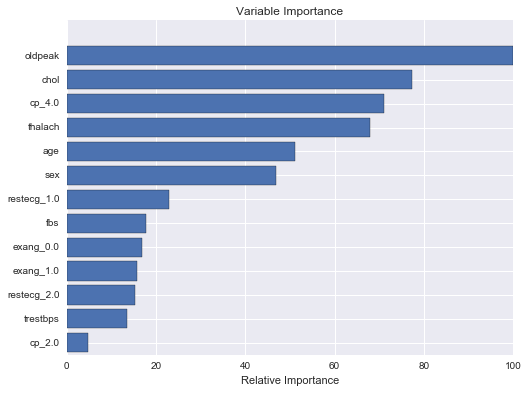

In [117]:
#%matplotlib inline
import matplotlib.pyplot as plt 
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-13:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(8, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
#with seaborn.axes_style('white'):
plt.show()

In [119]:
#Set new variables
#Set X and Y
Y = df.num
include_list = ['oldpeak','exang_1.0','thalach','age', 'cp_4.0']
X = df[include_list]

X.columns

Index([u'oldpeak', u'exang_1.0', u'thalach', u'age', u'cp_4.0'], dtype='object')

In [18]:
cross_val (X,Y,
               (  LogisticRegression,
                  GaussianNB,
                  DecisionTreeClassifier,
                  RandomForestClassifier,
                  ExtraTreesClassifier, 
                  AdaBoostClassifier),
           cross_folds=10,
           knn_size=10,
           DTC_depth=4)

Using CV: 10                ['accuracy', 'precision', 'recall']
--------------------------------------
LogisticRegression             0.7896 0.8022 0.7706
GaussianNB                     0.7879 0.8072 0.7705
DecisionTreeClassifier  (Dep=1) 0.7638  0.7399 0.7832
DecisionTreeClassifier  (Dep=2) 0.7623  0.7343 0.7895
DecisionTreeClassifier  (Dep=3) 0.7759  0.7632 0.8351
DecisionTreeClassifier  (Dep=4) 0.7531  0.7455 0.8091
RandomForestClassifier  (Dep=1) 0.7730  0.7695 0.7289
RandomForestClassifier  (Dep=2) 0.7699  0.7985 0.7353
RandomForestClassifier  (Dep=3) 0.7654  0.7941 0.7608
RandomForestClassifier  (Dep=4) 0.7684  0.7842 0.7610
ExtraTreesClassifier    (Dep=1) 0.7699  0.7620 0.7735
ExtraTreesClassifier    (Dep=2) 0.7773  0.7734 0.7606
ExtraTreesClassifier    (Dep=3) 0.7819  0.7724 0.7702
ExtraTreesClassifier    (Dep=4) 0.7834  0.7802 0.7735
AdaBoostClassifier             0.7503 0.7698 0.7359


In [19]:
'''
for i in include_list:
    sns.distplot(df[i])
    plt.show()
    
'''

'\nfor i in include_list:\n    sns.distplot(df[i])\n    plt.show()\n    \n'

In [120]:
def cross_val (X,Y, 
               algorithm_tuple =(LogisticRegression,KNeighborsClassifier), 
               cross_folds=10,
               knn_size=1,
               DTC_depth=5,
               trees=40,
               scoring_list=["accuracy","precision","recall"]):
    from sklearn.cross_validation import cross_val_score
    names, accs = [],[]
    print "Using CV:",cross_folds,"              ",scoring_list
    print "--------------------------------------"
    
    for algorithm in (algorithm_tuple):
        #special case for KNN
        if algorithm == KNeighborsClassifier:
            for n in range(1,knn_size+1):
                scores = []
                index = 0
                message_to_print_part1="'%-23s (n=%i)   "
                message_to_print_part2=" (algorithm.__name__,n"
                for score_item in scoring_list:
                    mean_score = np.mean(cross_val_score(KNeighborsClassifier(n), X,Y, cv=cross_folds,scoring=score_item))
                    scores.append(mean_score)
                    message_to_print_part1+=" %.4f"
                    message_to_print_part2+=", scores["+str(index)+"]"
                    index +=1
                    #print "in it",score_item, mean_score
                #print "out of it", scores
                message_to_print_part1+="' %"
                message_to_print_part2+=")"
                message_to_print_part1+=message_to_print_part2
                names.append(algorithm.__name__ + " N="+str(n)) 
                print (eval(message_to_print_part1))
                #print '%-23s (n=%i)  %.4f %.4f %.4f' % (algorithm.__name__,n, scores[0], scores[1], scores[2])   
                accs.append(scores)        
                
        elif algorithm ==DecisionTreeClassifier:     
            for depth in range(1,DTC_depth+1):
                scores = []
                for score_item in scoring_list:
                    mean_score = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=depth, class_weight="balanced"), X,Y, 
                                                       cv=cross_folds,scoring=score_item))
                    scores.append(mean_score)
                
                print '%-23s (Dep=%i) %.4f  %.4f %.4f' % (algorithm.__name__,depth, scores[0], scores[1], scores[2])
                names.append(algorithm.__name__ + " D="+str(depth)) 
                accs.append(scores)
        
        elif algorithm in (RandomForestClassifier,ExtraTreesClassifier):
               for depth in range(1,DTC_depth+1):
                scores = []
                for score_item in scoring_list:
                    mean_score = np.mean(cross_val_score(algorithm(n_estimators=trees,max_depth=depth), X,Y, 
                                                         cv=cross_folds,scoring=score_item))
                    scores.append(mean_score)
                
                print '%-23s (Dep=%i) %.4f  %.4f %.4f' % (algorithm.__name__,depth, scores[0], scores[1], scores[2])
                names.append(algorithm.__name__ + " D="+str(depth)) 
                accs.append(scores)             
        else:
            scores = []
            for score_item in scoring_list:
                mean_score = np.mean(cross_val_score(algorithm(), X,Y, cv=cross_folds,scoring=score_item))
                scores.append(mean_score)

            print '%-30s %.4f %.4f %.4f' % (algorithm.__name__, scores[0], scores[1], scores[2])  
            names.append(algorithm.__name__)
            accs.append(scores)
            
    #print 'Max accuracy:              %.4f' % max(accs) 
    return accs, names

In [121]:
from sklearn import preprocessing
X = preprocessing.scale(X)

(scores,names)= cross_val (X,Y,
               (  KNeighborsClassifier,
                  LogisticRegression,
                  GaussianNB,
                  DecisionTreeClassifier,
                  RandomForestClassifier,
                  ExtraTreesClassifier, 
                  AdaBoostClassifier),
           cross_folds=10,
           knn_size=5,
           DTC_depth=5,
            scoring_list=["accuracy","f1","recall"])

Using CV: 10                ['accuracy', 'f1', 'recall']
--------------------------------------
KNeighborsClassifier    (n=1)    0.6638 0.6551 0.6754
KNeighborsClassifier    (n=2)    0.6971 0.6137 0.5319
KNeighborsClassifier    (n=3)    0.7304 0.7071 0.6976
KNeighborsClassifier    (n=4)    0.7409 0.6927 0.6303
KNeighborsClassifier    (n=5)    0.7334 0.7146 0.7101
LogisticRegression             0.7833 0.7643 0.7483
GaussianNB                     0.7969 0.7810 0.7706
DecisionTreeClassifier  (Dep=1) 0.7638  0.7595 0.7832
DecisionTreeClassifier  (Dep=2) 0.7623  0.7594 0.7895
DecisionTreeClassifier  (Dep=3) 0.7591  0.7332 0.6974
DecisionTreeClassifier  (Dep=4) 0.7424  0.7320 0.7259
DecisionTreeClassifier  (Dep=5) 0.7349  0.7354 0.7611
RandomForestClassifier  (Dep=1) 0.7773  0.7439 0.7000
RandomForestClassifier  (Dep=2) 0.7758  0.7471 0.6971
RandomForestClassifier  (Dep=3) 0.7803  0.7464 0.7229
RandomForestClassifier  (Dep=4) 0.7803  0.7571 0.7136
RandomForestClassifier  (Dep=5) 0.7606  0.73

In [140]:
def plot_classifiers (scores,names,scoring="accs"):
    
    #scoring options are: accs, prec, reca
    
    import matplotlib.pyplot as plt 
    accs = [x[0] for x in scores]
    prec = [x[1] for x in scores]
    reca = [x[2] for x in scores]
    
    if scoring == "accs":
        accs = accs
        label_name = "Accuracy"
    elif scoring =="prec":
        accs = prec
        label_name = "f1"
    else:
        accs = reca
        label_name = "Recall"
        
    min_score = min(accs)-0.02
    max_score = max(accs)+0.02

    num_bars = len(accs)
    plt.figure(figsize=(15,5))

    plt.subplot(121)
    plt.bar(range(num_bars), accs, color='#75A3FF')
    plt.xticks(np.arange(num_bars)+0.35, names, rotation=90)
    #plt.xticks(names, rotation=90)
    plt.ylabel(label_name)
    plt.title('Scoring by model')

    plt.subplot(122)
    plt.bar(range(num_bars), accs, color='#CC6699')
    plt.xticks(np.arange(num_bars)+0.35, names, rotation=90)
    plt.ylim(min_score, max_score)
    plt.ylabel(label_name)
    plt.title('Zooming in to see differences')
    
    return None

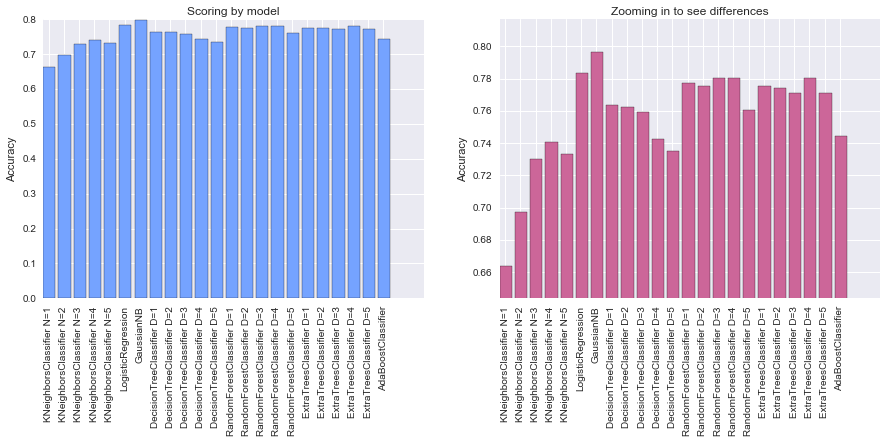

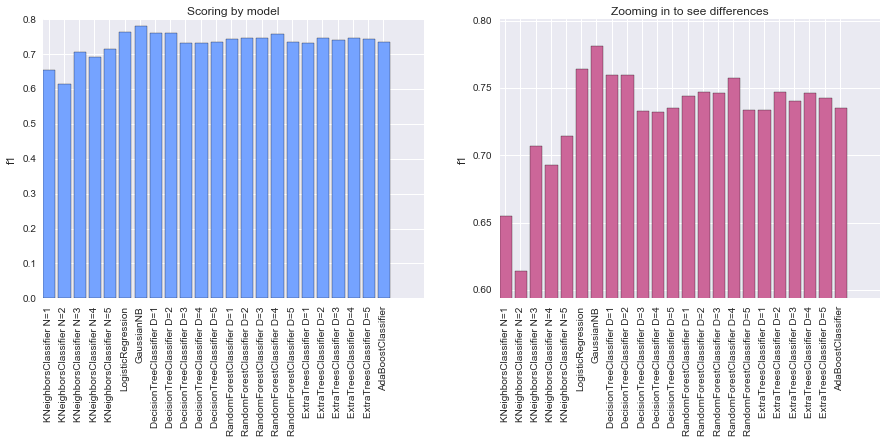

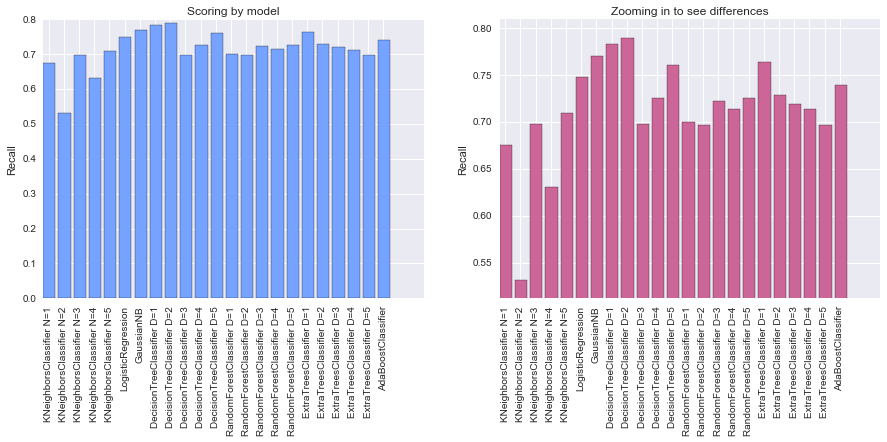

In [141]:
plot_classifiers (scores,names,scoring="accs")
plot_classifiers (scores,names,scoring="prec")
plot_classifiers (scores,names,scoring="reca")


In [185]:
(scores,names)= cross_val (X,Y,
               (  KNeighborsClassifier,
                  LogisticRegression,
                  GaussianNB,
                  DecisionTreeClassifier,
                  RandomForestClassifier,
                  ExtraTreesClassifier, 
                  AdaBoostClassifier),
           cross_folds=10,
           knn_size=5,
           DTC_depth=5,
            scoring_list=["accuracy","precision","recall"])

Using CV: 10                ['accuracy', 'precision', 'recall']
--------------------------------------
KNeighborsClassifier    (n=1)    0.6638 0.6692 0.6754
KNeighborsClassifier    (n=2)    0.6971 0.7834 0.5319
KNeighborsClassifier    (n=3)    0.7304 0.7484 0.6976
KNeighborsClassifier    (n=4)    0.7409 0.8134 0.6303
KNeighborsClassifier    (n=5)    0.7334 0.7448 0.7101
LogisticRegression             0.7833 0.8092 0.7483
GaussianNB                     0.7969 0.8196 0.7706
DecisionTreeClassifier  (Dep=1) 0.7638  0.7399 0.7832
DecisionTreeClassifier  (Dep=2) 0.7623  0.7343 0.7895
DecisionTreeClassifier  (Dep=3) 0.7591  0.8080 0.6974
DecisionTreeClassifier  (Dep=4) 0.7424  0.7559 0.7290
DecisionTreeClassifier  (Dep=5) 0.7349  0.7327 0.7611
RandomForestClassifier  (Dep=1) 0.7698  0.8017 0.7258
RandomForestClassifier  (Dep=2) 0.7788  0.8242 0.7004
RandomForestClassifier  (Dep=3) 0.7728  0.8125 0.7100
RandomForestClassifier  (Dep=4) 0.7788  0.8181 0.7165
RandomForestClassifier  (Dep=5) 0.768

In [186]:
import numpy as np
score_array = np.array(scores)
precision = score_array[:][:,1]
recall = score_array[:][:,2]

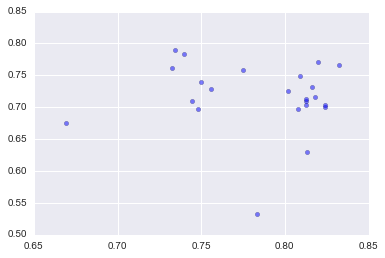

In [187]:
plt.scatter(precision,recall, alpha=0.5)